# Wykrywanie anomalii sieciowy &nbsp; | &nbsp; *Network Anomaly Detection*

## LAB 04 Autoenkodery (ae) &nbsp; | &nbsp; *Autoencoders (ae)*

- Autoenkodery &nbsp; | &nbsp; *Autoencoders*
- PCA  &nbsp; | &nbsp; *Principal component analysis (PCA)*


## Plan
|  | | |
| -------- | -------|---- |
| Wprowadzenie | *Introduction* | 15 min |
| Autoenkodery | *Autoencoders* |40 min |
| PCA | *PCA*  | 25 min |
| Podsumowanie | *Summary* | 10 min|

In [ ]:
#@title Required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set() # set default styles for seaborn
import jax
import jax.numpy as jnp
from jax.example_libraries.optimizers import adam
from jax.example_libraries import stax

# Diamenty &nbsp; | &nbsp; *Diamonds*

Dalej pracujemy na danych o diamentach, ale bez etykiet

*We continue to work with the diamond dataset, but without considering the labels*


In [ ]:
#@title get data
!gdown  https://drive.google.com/uc?id=1c4-h7TLRaDmijstDIFD093to9uZwYA6F

Downloading...
From: https://drive.google.com/uc?id=1c4-h7TLRaDmijstDIFD093to9uZwYA6F
To: /content/diamonds.csv
100% 2.45M/2.45M [00:00<00:00, 21.5MB/s]


In [ ]:
diamonds = pd.read_csv('diamonds.csv')
display(diamonds.head())
x_raw = diamonds[['carat', 'x', 'y', 'z']] # select columns
print('\n\n selected: \n')
display(x_raw)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75




 selected: 



,carat,x,y,z
0,0.23,3.95,3.98,2.43
1,0.21,3.89,3.84,2.31
2,0.23,4.05,4.07,2.31
3,0.29,4.20,4.23,2.63
4,0.31,4.34,4.35,2.75
...,...,...,...,...
53935,0.72,5.75,5.76,3.50
53936,0.72,5.69,5.75,3.61
53937,0.70,5.66,5.68,3.56
53938,0.86,6.15,6.12,3.74


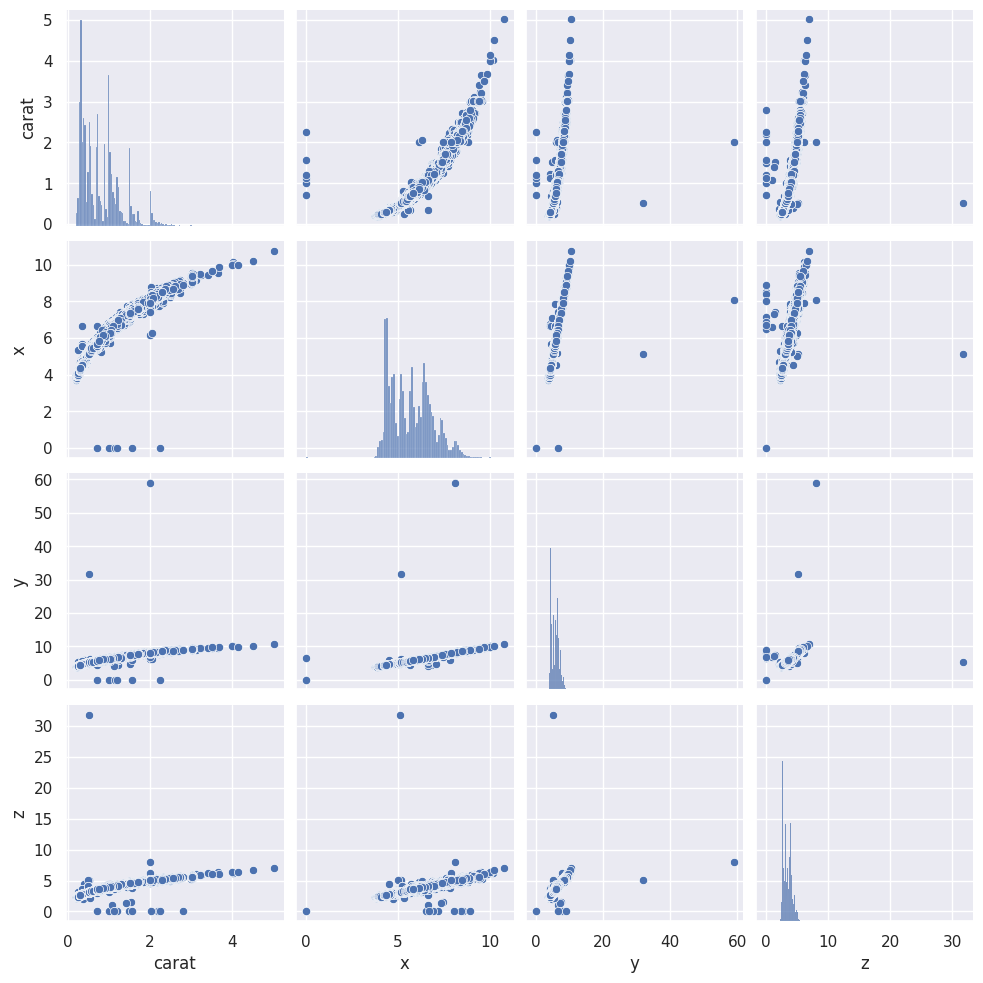

In [ ]:
sns.pairplot(x_raw);

In [ ]:
x = x_raw.to_numpy()
m = np.mean(x, 0)
display(m)
s = np.std(x, 0)
display(s)
x = (x-m)/s
print(x.mean(axis=0))
print(x.std(axis=0))

array([0.79793975, 5.73115721, 5.73452595, 3.53873378])

array([0.47400685, 1.12175035, 1.14212409, 0.70569231])

[ 2.44487823e-16  2.78210281e-16 -8.43061459e-17 -2.00227096e-16]
[1. 1. 1. 1.]


# μ lib  &nbsp; | &nbsp; *micro library*




In [ ]:
def vector_mse(y,yhat):
    return jnp.mean(jnp.square(y-yhat), axis=-1) # axis=-1, last axis

# Autoenkoder  &nbsp; | &nbsp; *Autoencoder*

Autoenkoder to siec neuronowa prezybliżająca funkcję $f(x)=x$.

*An autoencoder is a neural network that approximates the function $f(x)=x$*

## Zadanie 1 | &nbsp; *Task 1*

Zbudować i wytrenować autoenkoder kompresujący `x,y,z,carat` do jednej liczby.

*Build and train an autoencoder that compresses `x,y,z,carat` to a single number.*

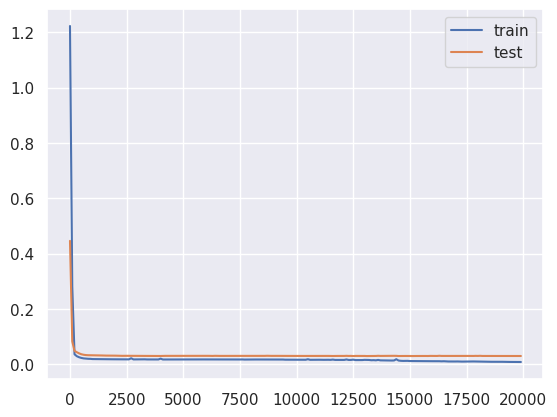

In [ ]:
batch_size = 128
steps = 20000
learning_rate = 0.001
train_split = int(0.7*x.shape[0])

k = jax.random.PRNGKey(42)

#TODO
encoder = stax.serial(....


decoder = stax.serial(....


nn = stax.serial(...

# TODO


losses=[]
test_losses=[]
train_steps=[]

for i in range(steps):
    idx = np.random.randint(0,train_split,size=batch_size)
    bx = x[idx,...]

    opt_state, step_loss = step(i, opt_state,bx,bx)

    if i % 100 == 0:
        tx = x[train_split:,...]
        test_losses.append(test_loss(opt_state,tx,tx))
        train_steps.append(i)
        losses.append(test_loss(opt_state, x[:train_split,...], x[:train_split,...]))

plt.plot(train_steps,losses,label='train')
plt.plot(train_steps,test_losses,label='test')

plt.legend()



## Zadanie 2  &nbsp; | &nbsp; *Task 2*

Narysować wykres rozrzutu rekonstrukcji danych.

*Draw a scatterplot of the data reconstruction.*

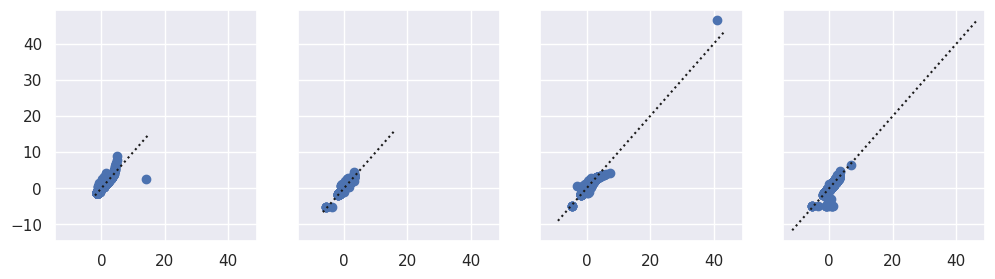

In [ ]:
# get reconstruction from x[:train_split,...]
rekonstrukcja = ...
# scatter plot for each column in x

## Zadanie 3  &nbsp;| &nbsp; *Task 3*
Narysować histogram ukrytej reprezentacji

*Draw a histogram of the hidden representation*



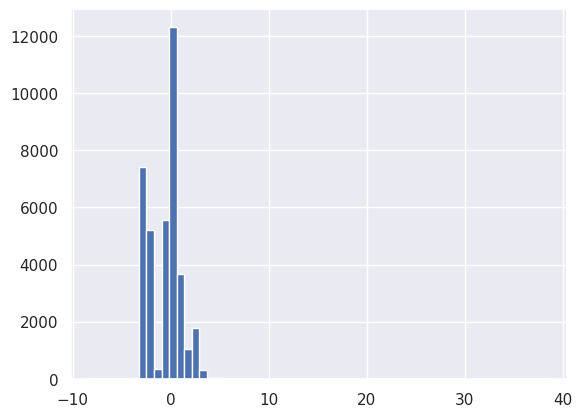

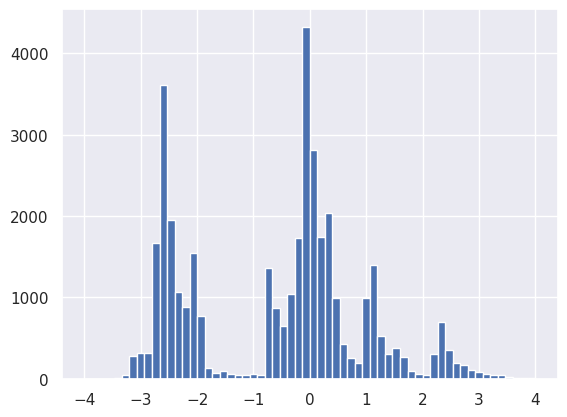

In [ ]:
# TODO
... = get_params(opt_state)


## Zadanie 4  &nbsp;| &nbsp; *Task 4*

1. Narysować histogram błędu rekonstrukcji na zbiorze testowym
 - *Plot a histogram of the reconstruction error on the test set*
2. Wprowadzić anomalie i ją wykryć
 - *Introduce anomalies and detect them*



In [ ]:
#TODO

# PCA  &nbsp;| &nbsp; *Principal Component Analysis*

PCA to liniowy autoenkoder, dla którego wiemy, że macierz transformacji jest utworzona z wektorów własnych macierzy kowariancji.

*PCA can be considered as a linear autoencoder for which we know that the transformation matrix is ​​formed from the eigenvectors of the covariance matrix.*


In [ ]:
x = diamonds[['x','y','z']].to_numpy()
m = np.mean(x, 0)
s = np.std(x, 0)
x = (x-m)/s


## Zadanie 5  &nbsp;| &nbsp; *Task 5*
Wykonać PCA na danych `x,y,z`

*Perform PCA on 'x,y,z' data*


In [ ]:
#TODO

In [ ]:
u,s,vh=np.linalg.svd(x,full_matrices=False)
fi = vh.T
z = u@np.diag(s)

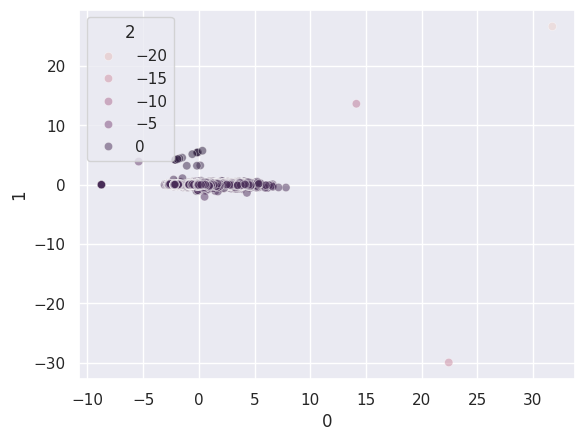

In [ ]:
sns.scatterplot(
    data= pd.DataFrame(z),
    x=0,
    y=1,
    hue=2,
    alpha=0.5
);